In [1]:
print(1)

1


install
* ipykernel
* numpy
* matplotlib

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import simpson


In [116]:
def relu(x):
  return max(0.0, x)

def build_model(segments):
  m1 = []
  b1 = []
  m2 = []

  for segment in segments:
    start, slope, end = segment
    if (slope >= 0):
      m1.append(slope)
      b1.append(-slope * start)
      m2.append(1)

      m1.append(slope)
      b1.append(-slope * end)
      m2.append(-1)
    else:
      m1.append(-slope)
      b1.append(slope * start)
      m2.append(-1)

      m1.append(-slope)
      b1.append(slope * end)
      m2.append(1)

  def f(x):
    dot = [relu(m1[i] * x + b1[i]) for i in range(len(m1))]
    sum = 0
    for i in range(0, len(dot)):
        sum += dot[i] * m2[i]
    # sum = 0
    # for i in range(0, len(m1), 2):
    #   sum += relu(m1[i] * x + b1[i])
    #   sum -= relu(m1[i + 1] * x + b1[i + 1])
    return sum
  
  return f

def build_model2(segments):
  m1 = []
  b1 = []

  start, slope, end = segments[0]
  # y = mx + b
  m1.append(slope)
  b1.append(-slope * start)

  m1.append(slope)
  b1.append(-slope * end)

  def f(x):
    y1 = relu(m1[0] * x + b1[0])
    y2 = relu(m1[1] * x + b1[1])
    # print(f"x: {x}, y1: {y1}, y2: {y2}, result: {y1 - y2}")
    return y1 - y2
    # return x * 2
    # y1 = relu(m1[0] * x + b1[0])
    # y2 = relu(m1[1] * x + b1[1])
    # print(f"{x}: {x}, y1: {y1}, y2: {y2}, result: {y1 - y2}")
    # return y1 - y2
  
    # return relu(m1[0] * x + b1[0]) - relu(m1[1] * x + b1[1])
    # return x
  
  return f
  # return lambda x: relu(m1[0] * x + b1[0])
  # return lambda x: x

# q = build_model([(0, 1, 1), (1, 2, 2)])

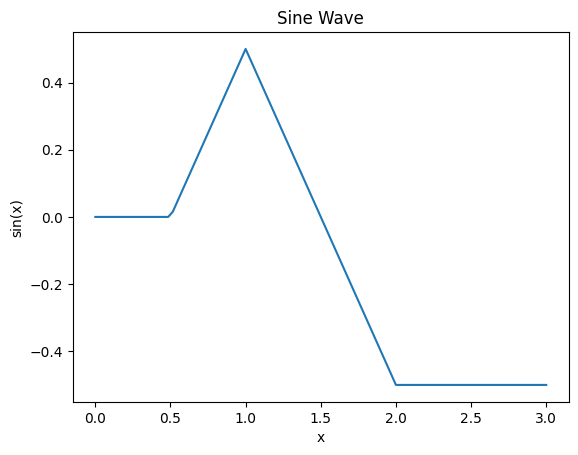

In [118]:
# Import necessary libraries
# model = build_model([(0.5, 1, 1), (1, -0.3, 2)])
model = build_model([(0.5, 1, 1), (1, -1, 2)])
# model = build_model([(1, -1, 2)])
# model = build_model([(0.5, -1, 1)])

# Generate x values
x = np.linspace(0, 3, 100)

# Compute y values as sine of x
y = np.vectorize(model)(x)
# for num in y:
#     print(num)
# Plot the sine wave
plt.plot(x, y)

# Add title and labels
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')

# Display the plot
plt.show()

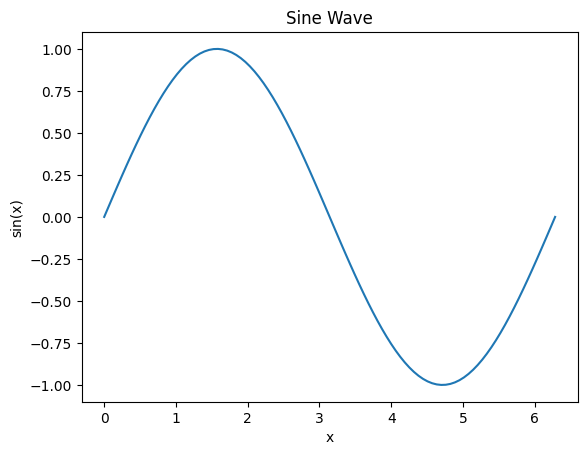

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 2 * np.pi, 100)

# Compute y values as sine of x
y = np.sin(x)

# Plot the sine wave
plt.plot(x, y)

# Add title and labels
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')

# Display the plot
plt.show()

Code to generate samples for training, validation, and evaluation

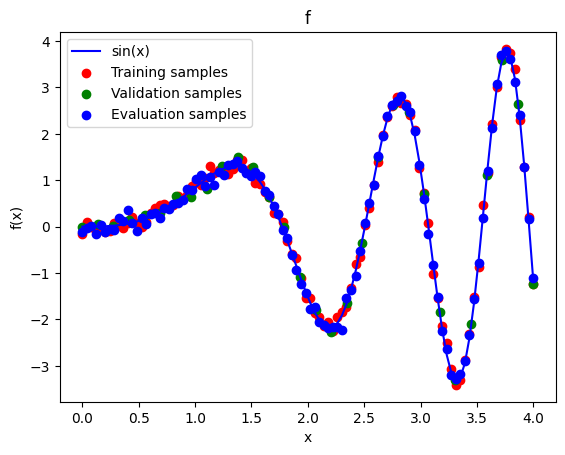

In [45]:
# Generates n samples of f(x) for values of x between x0 and x1
# Sample has gaussian noise with standard deviation std_dev
def noisey_sample(f, x0, x1, n, std_dev):
    x = np.linspace(x0, x1, n)
    y = np.vectorize(f)(x)
    noise = np.random.normal(0, std_dev, n)
    return x, y + noise


# f = np.cos
# f = lambda x: x **3
f = lambda x: np.sin(x ** 2) * x
x0 = 0 # -4
x1 = 4 # 2 * np.pi
n = 100

x_original = np.linspace(x0, x1, n)
y_original = np.vectorize(f)(x_original)
plt.plot(x_original, y_original, label="sin(x)", color="blue")

training = noisey_sample(f, x0, x1, 100, 0.1)
validation = noisey_sample(f, x0, x1, 30, 0.1)
evaluation = noisey_sample(f, x0, x1, 100, 0.1)
# Plot the sine wave
plt.scatter(training[0], training[1], color="red", label="Training samples")
plt.scatter(validation[0], validation[1], color="green", label="Validation samples")
plt.scatter(evaluation[0], evaluation[1], color="blue", label="Evaluation samples")


# Add title and labels
plt.title("f")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()

# Display the plot
plt.show()

## Code to generate linear model

x.size: 102, x[0]: 0.0, x[-1]: 4.08
y1.size: 102
y2.size: 102
ys: [ 0.          0.45852075  0.9170415   1.37556225  1.834083    2.29260375
  2.7511245   3.20964525  3.668166    4.12668675  4.5852075   5.04372825
  5.502249    5.96076975  6.4192905   6.87781125  7.336332    7.79485275
  8.2533735   8.71189425  9.170415    9.62893575 10.0874565  10.54597724
 11.00449799 11.46301874 11.92153949 12.38006024 12.83858099 13.29710174
 13.75562249 14.21414324 14.67266399 15.13118474 15.58970549 16.04822624
 16.50674699 16.96526774 17.42378849 17.88230924 18.34082999 18.79935074
 19.25787149 19.71639224 20.17491299 20.63343374 21.09195449 21.55047524
 22.00899599 22.46751674]
Append x[38] = 1.535049504950495
Append x[47] = 1.8986138613861387
Append x[51] = 2.0601980198019803
Append x[58] = 2.342970297029703
Append x[61] = 2.464158415841584
Append x[63] = 2.544950495049505
Append x[64] = 2.5853465346534654
Append x[66] = 2.6661386138613863
Append x[67] = 2.7065346534653467
Append x[71] = 2.86811

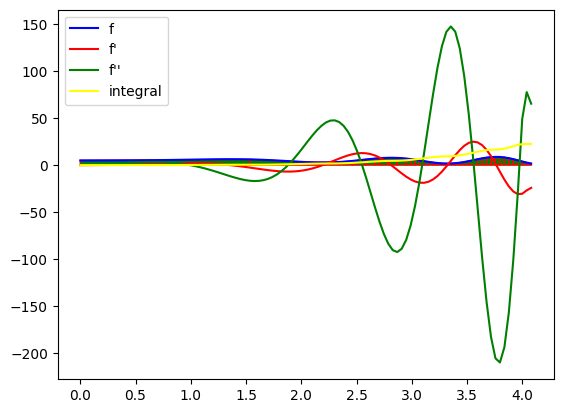

: 

In [81]:
# Compute integral of absolute value of slope
# Generate unifrom sample of y-values from range of integral

def gen(f, x0, x1, n):
    # Add two extra samples to allow computation of second derivative
    x = np.linspace(x0, x1 + (x1 - x0)*2/n, n + 2)
    y = np.vectorize(f)(x)
    y1 = np.gradient(y, x)
    y2 = np.gradient(y1, x)
    return x, y, y1, y2

# f = lambda x: x ** 2
# f = lambda x: x ** 3 + np.sin(x) * 20
# f = np.sin
# f = np.tan
# f = lambda x: np.sin(np.sin(x))
# f = lambda x: np.sin(x*x)
f = lambda x: np.sin(x ** 2) * x + 5


x, y, y1, y2 = gen(f, 0, 4, 100)
print(f"x.size: {x.size}, x[0]: {x[0]}, x[-1]: {x[-1]}")
print(f"y1.size: {y1.size}")
print(f"y2.size: {y2.size}")

# Compute the integral of the absolute value of the second derivative
# abs_y2 = np.abs(y2)
# integral_abs_y2 = simpson(abs_y2, x=x)
integral = []
sum = 0
for i in range(len(y2)-1):
    # sum += abs(y1[i+1]-y1[i])
    sum += abs(y2[i+1]-y2[i])
    # sum += abs(y2[i])
    integral.append(sum / 50)  # HACK: scale to make easier to compare with f
integral.append(integral[-1])  # HACK: Add one more value to make the length of integral the same as x

m = 50
ys = np.linspace(0, integral[-1], m)
print(f"ys: {ys}")
# print(integral)
xs = np.linspace(x0, x1, 1000)
ps = []

# Variables
#   x: samples x-values
#   y: values of f(x)
#   integral: the integral of abs(second derivative of f)
#   ys: uniform samples of integral
#   xs: x-values corresponding to ys values

# Assumptions
#   First and last ys correspond to x[0] and x[-1]
#     np.linspace guarantees this
#   The integral is monotonically increasing
#     This is a property of an integral of an absolute value
#   xs has at least two entries
#   xs and integral have the same number of entries
#   ys has at least three entries (first, last, and at least one middle)
xs = [x[0]]
xi = 1
# for yi in range(1, len(ys)-2):
#     while integral[xi] < ys[yi]:
#         xi += 1
#         if xi >= len(x):
#             break
#     if xi < len(x):
#         print(f"Append x[{xi}] = {x[xi]}")
#         xs.append(x[xi])
for yi in range(1, len(ys)-2):
    while xi < len(x) and integral[xi] < ys[yi]:
        xi += 1
    if xi < len(x):
        print(f"Append x[{xi}] = {x[xi]}")
        xs.append(x[xi])
        xi += 1
xs.append(x[len(x)-1])

print(f"xs: {xs}")

fig, ax = plt.subplots()
for i in range(len(xs) - 1):
    width = xs[i+1] - xs[i]
    height = f(xs[i+1])
    vertices = [(xs[i], 0), (xs[i], f(xs[i])), (xs[i+1], f(xs[i+1])), (xs[i+1], 0)]
    polygon = patches.Polygon(vertices, closed=True, fill=True, edgecolor='r', facecolor='g')
    print(f"{i}: {polygon}")
    ax.add_patch(polygon)

    # rect = patches.Rectangle((xs[i], 0), width, height, edgecolor='r', facecolor='g', alpha=0.5)
    # print(f"{i}: {rect}")
    # ax.add_patch(rect)

plt.plot(x, y, label="f", color="blue")
plt.plot(x, y1, label="f'", color="red")
plt.plot(x, y2, label="f''", color="green")
plt.plot(x, integral, label="integral", color="yellow")
plt.legend()
plt.show()


# Junk after here

In [ ]:
m = build_model([(0.5, 1, 1)])
x = np.linspace(0, 2, 20)
# print(m(0))
# for num in x:
#     print(m(num))
print("================xx")
print(m(0.7368421052631579))
print("================xx")
y = np.vectorize(m)(x)
for x_val, y_val in zip(x, y):
    print(f"x: {x_val}, y: {y_val}")# for num in y:
#     print(num)
y
